# MetaLearning - FewShotLearning

Mini ImageNet 이미지를 활용해서 메타러닝 분류를 진행할 것이다.
Mini ImageNet 은 총 100개의 클래스(라벨)을 갖고 있고 train에 64, validation에 16, test에 20개의 클래스가 있고, 각 클래스별로 600개의 이미지가 있어 총 60000개의 이미지가 있다.

## csv파일 불러오기
csv파일에는 train.csv에 64개, val.csv에 16개, test.csv에 20개의 클래스의 이미지 리스트가 들어있다.

In [22]:
import pandas as pd
SupportSet = pd.read_csv('files/train.csv')
QuerySet = pd.read_csv('files/val.csv')
[SupportSet, QuerySet]

[                    filename      label
 0      n0153282900000005.jpg  n01532829
 1      n0153282900000006.jpg  n01532829
 2      n0153282900000007.jpg  n01532829
 3      n0153282900000010.jpg  n01532829
 4      n0153282900000014.jpg  n01532829
 ...                      ...        ...
 38395  n1313361300001288.jpg  n13133613
 38396  n1313361300001290.jpg  n13133613
 38397  n1313361300001296.jpg  n13133613
 38398  n1313361300001297.jpg  n13133613
 38399  n1313361300001299.jpg  n13133613
 
 [38400 rows x 2 columns],
                    filename      label
 0     n0185567200000003.jpg  n01855672
 1     n0185567200000004.jpg  n01855672
 2     n0185567200000010.jpg  n01855672
 3     n0185567200000013.jpg  n01855672
 4     n0185567200000016.jpg  n01855672
 ...                     ...        ...
 9595  n0925647900001283.jpg  n09256479
 9596  n0925647900001284.jpg  n09256479
 9597  n0925647900001285.jpg  n09256479
 9598  n0925647900001286.jpg  n09256479
 9599  n0925647900001291.jpg  n09256479

### 클래스(라벨) 보기 쉽게 숫자로 바꾸기

In [23]:
spLabels = SupportSet['label'].unique()
qrLabels = QuerySet['label'].unique()

newSpLabels = dict(zip(spLabels, range(1, len(spLabels)+1)))
newQrLabels = dict(zip(qrLabels, range(len(spLabels)+1, len(spLabels)+len(qrLabels)+1)))

SupportSet['label'] = SupportSet['label'].replace(newSpLabels)
QuerySet['label'] = QuerySet['label'].replace(newQrLabels)

[SupportSet, QuerySet]

/var/folders/f_/0zs37pm93zs03jg8pk35g5bm0000gn/T/ipykernel_92872/318858424.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  SupportSet['label'] = SupportSet['label'].replace(newSpLabels)
/var/folders/f_/0zs37pm93zs03jg8pk35g5bm0000gn/T/ipykernel_92872/318858424.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QuerySet['label'] = QuerySet['label'].replace(newQrLabels)


[                    filename  label
 0      n0153282900000005.jpg      1
 1      n0153282900000006.jpg      1
 2      n0153282900000007.jpg      1
 3      n0153282900000010.jpg      1
 4      n0153282900000014.jpg      1
 ...                      ...    ...
 38395  n1313361300001288.jpg     64
 38396  n1313361300001290.jpg     64
 38397  n1313361300001296.jpg     64
 38398  n1313361300001297.jpg     64
 38399  n1313361300001299.jpg     64
 
 [38400 rows x 2 columns],
                    filename  label
 0     n0185567200000003.jpg     65
 1     n0185567200000004.jpg     65
 2     n0185567200000010.jpg     65
 3     n0185567200000013.jpg     65
 4     n0185567200000016.jpg     65
 ...                     ...    ...
 9595  n0925647900001283.jpg     80
 9596  n0925647900001284.jpg     80
 9597  n0925647900001285.jpg     80
 9598  n0925647900001286.jpg     80
 9599  n0925647900001291.jpg     80
 
 [9600 rows x 2 columns]]

## Mini ImageNet 이미지 리사이징 하기

이미지 파일의 크기가 다르기 때문에 84*84로 모든 이미지를 리사이징 했다.

In [24]:
from PIL import Image
import os

# 이미지 디렉토리 경로
image_dir = 'image/'
output_size = (84, 84)  # 원하는 크기 (84x84)

# 이미지 리사이즈 함수
def resize_images(image_dir, output_size):
    for image_file in os.listdir(image_dir):
        image_path = os.path.join(image_dir, image_file)
        
        # 이미지 파일만 처리 (확장자로 필터링)
        if image_file.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                with Image.open(image_path) as img:
                    resized_img = img.resize(output_size)  # 이미지 리사이즈
                    resized_img.save(image_path)  # 원본 파일 덮어쓰기
            except Exception as e:
                print(f"Error processing file {image_file}: {e}")

# 실행
resize_images(image_dir, output_size)

Class: 0
Images:


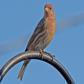

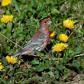

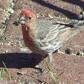

--------------------------------------------------
Class: 1
Images:


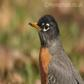

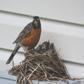

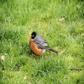

--------------------------------------------------
Class: 2
Images:


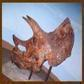

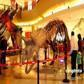

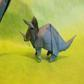

--------------------------------------------------
Class: 3
Images:


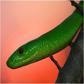

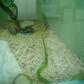

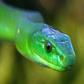

--------------------------------------------------
Class: 4
Images:


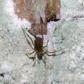

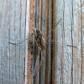

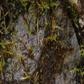

--------------------------------------------------
Class: 5
Images:


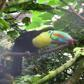

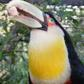

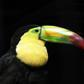

--------------------------------------------------
Class: 6
Images:


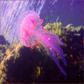

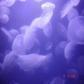

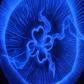

--------------------------------------------------
Class: 7
Images:


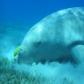

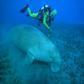

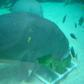

--------------------------------------------------
Class: 8
Images:


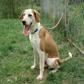

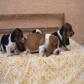

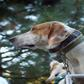

--------------------------------------------------
Class: 9
Images:


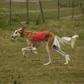

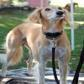

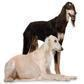

--------------------------------------------------
Class: 10
Images:


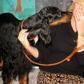

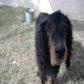

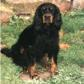

--------------------------------------------------
Class: 11
Images:


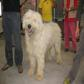

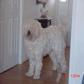

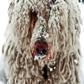

--------------------------------------------------
Class: 12
Images:


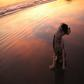

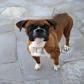

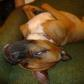

--------------------------------------------------
Class: 13
Images:


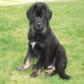

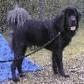

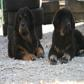

--------------------------------------------------
Class: 14
Images:


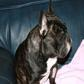

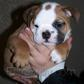

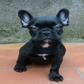

--------------------------------------------------
Class: 15
Images:


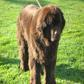

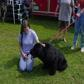

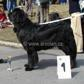

--------------------------------------------------
Class: 16
Images:


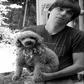

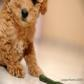

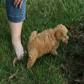

--------------------------------------------------
Class: 17
Images:


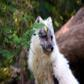

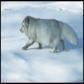

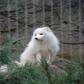

--------------------------------------------------
Class: 18
Images:


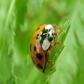

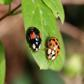

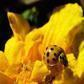

--------------------------------------------------
Class: 19
Images:


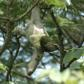

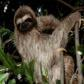

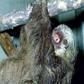

--------------------------------------------------
Class: 20
Images:


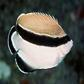

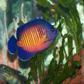

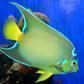

--------------------------------------------------
Class: 21
Images:


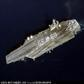

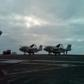

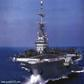

--------------------------------------------------
Class: 22
Images:


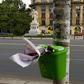

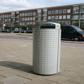

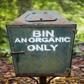

--------------------------------------------------
Class: 23
Images:


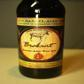

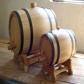

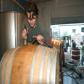

--------------------------------------------------
Class: 24
Images:


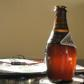

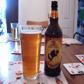

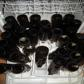

--------------------------------------------------
Class: 25
Images:


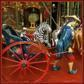

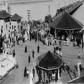

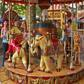

--------------------------------------------------
Class: 26
Images:


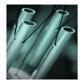

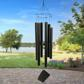

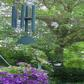

--------------------------------------------------
Class: 27
Images:


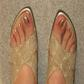

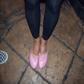

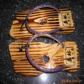

--------------------------------------------------
Class: 28
Images:


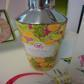

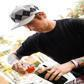

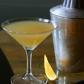

--------------------------------------------------
Class: 29
Images:


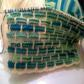

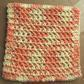

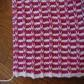

--------------------------------------------------
Class: 30
Images:


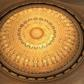

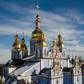

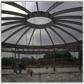

--------------------------------------------------
Class: 31
Images:


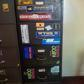

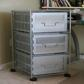

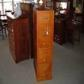

--------------------------------------------------
Class: 32
Images:


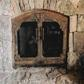

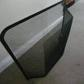

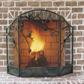

--------------------------------------------------
Class: 33
Images:


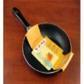

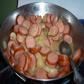

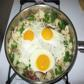

--------------------------------------------------
Class: 34
Images:


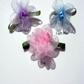

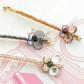

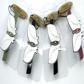

--------------------------------------------------
Class: 35
Images:


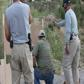

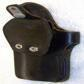

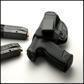

--------------------------------------------------
Class: 36
Images:


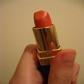

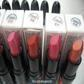

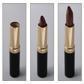

--------------------------------------------------
Class: 37
Images:


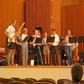

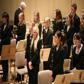

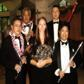

--------------------------------------------------
Class: 38
Images:


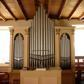

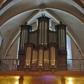

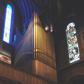

--------------------------------------------------
Class: 39
Images:


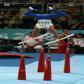

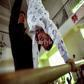

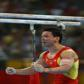

--------------------------------------------------
Class: 40
Images:


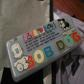

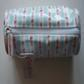

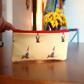

--------------------------------------------------
Class: 41
Images:


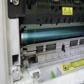

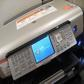

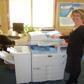

--------------------------------------------------
Class: 42
Images:


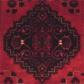

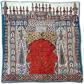

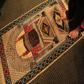

--------------------------------------------------
Class: 43
Images:


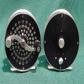

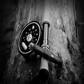

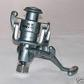

--------------------------------------------------
Class: 44
Images:


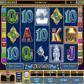

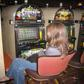

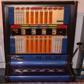

--------------------------------------------------
Class: 45
Images:


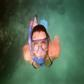

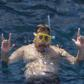

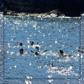

--------------------------------------------------
Class: 46
Images:


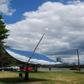

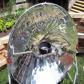

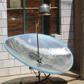

--------------------------------------------------
Class: 47
Images:


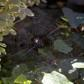

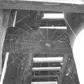

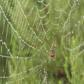

--------------------------------------------------
Class: 48
Images:


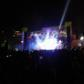

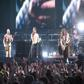

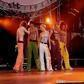

--------------------------------------------------
Class: 49
Images:


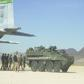

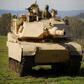

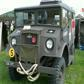

--------------------------------------------------
Class: 50
Images:


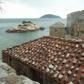

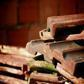

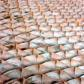

--------------------------------------------------
Class: 51
Images:


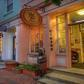

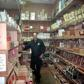

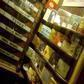

--------------------------------------------------
Class: 52
Images:


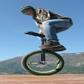

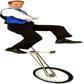

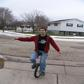

--------------------------------------------------
Class: 53
Images:


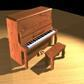

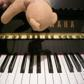

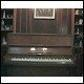

--------------------------------------------------
Class: 54
Images:


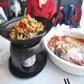

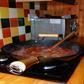

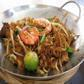

--------------------------------------------------
Class: 55
Images:


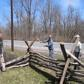

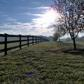

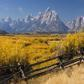

--------------------------------------------------
Class: 56
Images:


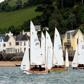

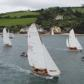

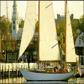

--------------------------------------------------
Class: 57
Images:


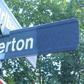

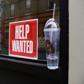

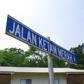

--------------------------------------------------
Class: 58
Images:


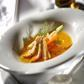

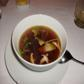

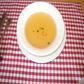

--------------------------------------------------
Class: 59
Images:


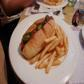

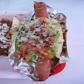

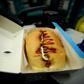

--------------------------------------------------
Class: 60
Images:


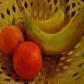

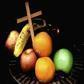

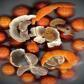

--------------------------------------------------
Class: 61
Images:


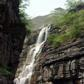

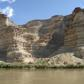

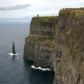

--------------------------------------------------
Class: 62
Images:


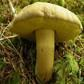

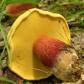

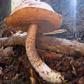

--------------------------------------------------
Class: 63
Images:


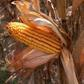

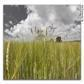

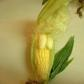

--------------------------------------------------


In [25]:
from IPython.display import Image, display
import os

# 이미지 디렉토리 경로
image_dir = 'image/'

# 클래스별로 이미지 파일 확인
grouped_images = trainset.groupby('label')['filename'].apply(list)

# 각 클래스와 해당 이미지 파일 출력
for label, images in grouped_images.items():
    print(f"Class: {label}")
    print("Images:")
    for image_file in images[:3]:  # 각 클래스별로 최대 3개의 이미지를 표시
        image_path = os.path.join(image_dir, image_file)  # 이미지 경로 생성
        display(Image(filename=image_path))  # 이미지 표시
    print("-" * 50)

In [26]:
# SupportSet에서 이미지와 라벨 추출
SpImgList = SupportSet['filename'].tolist()
SpClassList = SupportSet['label'].tolist()

# QuerySet에서 이미지와 라벨 추출
QrImgList = QuerySet['filename'].tolist()
QrClassList = QuerySet['label'].tolist()

print("Support Images:", SpImgList[:5])  # SupportSet의 첫 5개 이미지
print("Support Labels:", SpClassList[:5])  # SupportSet의 첫 5개 라벨
print("Query Images:", QrImgList[:5])      # QuerySet의 첫 5개 이미지
print("Query Labels:", QrClassList[:5])      # QuerySet의 첫 5개 라벨

Support Images: ['n0153282900000005.jpg', 'n0153282900000006.jpg', 'n0153282900000007.jpg', 'n0153282900000010.jpg', 'n0153282900000014.jpg']
Support Labels: [1, 1, 1, 1, 1]
Query Images: ['n0185567200000003.jpg', 'n0185567200000004.jpg', 'n0185567200000010.jpg', 'n0185567200000013.jpg', 'n0185567200000016.jpg']
Query Labels: [65, 65, 65, 65, 65]


3. 모델 학습에 바로 활용
이제 support_images와 query_images를 활용하여 모델 학습 및 평가를 진행할 수 있습니다. 예를 들어, 이미지를 로드하고 모델에 입력하는 코드를 작성할 수 있습니다.

In [27]:
from PIL import Image
import torch
from torchvision import transforms

# 이미지 변환 (84x84 크기, 텐서로 변환)
transform = transforms.Compose([
    transforms.Resize((84, 84)),
    transforms.ToTensor()
])

# SupportSet 이미지 로드
support_tensors = [transform(Image.open(f"image/{img}")) for img in SpImgList]

# QuerySet 이미지 로드
query_tensors = [transform(Image.open(f"image/{img}")) for img in QrImgList]

# 텐서 스택
support_tensors = torch.stack(support_tensors)  # SupportSet 텐서
query_tensors = torch.stack(query_tensors)      # QuerySet 텐서

print("Support Tensors Shape:", support_tensors.shape)
print("Query Tensors Shape:", query_tensors.shape)

Support Tensors Shape: torch.Size([38400, 3, 84, 84])
Query Tensors Shape: torch.Size([9600, 3, 84, 84])


# 학습하기?

In [33]:
#Prototypical Network
import torch
import torch.nn as nn
import torch.nn.functional as F

class ProtoNet(nn.Module):
    def __init__(self):
        super(ProtoNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )

    def forward(self, x):
        return self.encoder(x)

In [34]:
def train_protonet(model, support_tensors, support_labels, query_tensors, query_labels, optimizer, num_classes=5):
    model.train()
    optimizer.zero_grad()

    # Support Set 특징 추출
    support_features = model(support_tensors)  # (num_classes * num_shots, feature_dim)
    support_features = support_features.view(num_classes, -1, support_features.size(-1)).mean(dim=1)  # 프로토타입 계산

    # Query Set 특징 추출
    query_features = model(query_tensors)  # (num_queries, feature_dim)

    # Query Set과 프로토타입 간의 거리 계산
    distances = torch.cdist(query_features, support_features)  # (num_queries, num_classes)

    # Cross-entropy loss 계산
    loss = F.cross_entropy(-distances, query_labels)

    # 역전파 및 최적화
    loss.backward()
    optimizer.step()

    return loss.item()

In [35]:
def evaluate_protonet(model, support_tensors, support_labels, query_tensors, query_labels, num_classes=5):
    model.eval()
    with torch.no_grad():
        # Support Set 특징 추출
        support_features = model(support_tensors)
        support_features = support_features.view(num_classes, -1, support_features.size(-1)).mean(dim=1)

        # Query Set 특징 추출
        query_features = model(query_tensors)

        # Query Set과 프로토타입 간의 거리 계산
        distances = torch.cdist(query_features, support_features)

        # 예측 및 정확도 계산
        predictions = distances.argmin(dim=1)
        accuracy = (predictions == query_labels).float().mean().item()

    return accuracy

In [ ]:
# 모델 초기화
model = ProtoNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# 학습 및 평가 루프
num_epochs = 10
for epoch in range(num_epochs):
    loss = train_protonet(model, support_tensors, torch.tensor(SpClassList), query_tensors, torch.tensor(QrClassList), optimizer)
    accuracy = evaluate_protonet(model, support_tensors, torch.tensor(SpClassList), query_tensors, torch.tensor(QrClassList))
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.4f}")